In [1]:
from datetime import datetime
from datetime import date
from subgrounds.subgraph import SyntheticField, FieldPath
from subgrounds.subgrounds import Subgrounds
import pandas as pd
import duckdb as db
import  os as os
import seaborn as sns
import matplotlib.pyplot as plt

Sushiswap: https://thegraph.com/explorer/subgraphs/7h1x51fyT5KigAhXd8sdE3kzzxQDJxxz1y66LTFiC3mS?view=Playground
Curve: https://thegraph.com/explorer/subgraphs/GAGwGKc4ArNKKq9eFTcwgd1UGymvqhTier9Npqo1YvZB?view=Playground
Balancer: https://thegraph.com/explorer/subgraphs/Ei5typKWPepPSgqkaKf3p5bPhgJesnu1RuRpyt69Pcrx?view=Overview
Uniswap: https://thegraph.com/explorer/subgraphs/ELUcwgpm14LKPLrBRuVvPvNKHQ9HvwmtKgKSH6123cr7?view=Playground

In [2]:
sg = Subgrounds()
apiKey = file = input('API Key, please')

In [33]:
global file
file = input('Selet a folder to save output') ##enter your file path here - the file is in the repo "summary_stats.csv".

sushi7 = sg.load_api('https://gateway.thegraph.com/api/'+apiKey+'/subgraphs/id/7h1x51fyT5KigAhXd8sdE3kzzxQDJxxz1y66LTFiC3mS')

In [4]:
balancer = sg.load_api('https://gateway.thegraph.com/api/'+apiKey+'/subgraphs/id/Ei5typKWPepPSgqkaKf3p5bPhgJesnu1RuRpyt69Pcrx')

uniswap = sg.load_api('https://gateway.thegraph.com/api/'+apiKey+'/subgraphs/id/ELUcwgpm14LKPLrBRuVvPvNKHQ9HvwmtKgKSH6123cr7')

curve = sg.load_api('https://gateway.thegraph.com/api/'+apiKey+'/subgraphs/id/GAGwGKc4ArNKKq9eFTcwgd1UGymvqhTier9Npqo1YvZB')

In [49]:
frax = sg.load_api('https://api.thegraph.com/subgraphs/name/frax-finance-data/fraxswap-subgraph---mainnet')

In [42]:
balancerEvents = balancer.Query.swaps(
        orderBy='timestamp',
        orderDirection='desc',
        first=1000,
        where={ 'pool_in': ['0xd1ec5e215e8148d76f4460e4097fd3d5ae0a3558','0x76fcf0e8c7ff37a47a799fa2cd4c13cde0d981c9','0x2de32a7c98c3ef6ec79e703500e8ca5b2ec819aa', '0xf5f6fb82649df7991054ef796c39da81b93364df', '0xfb46bc8fc0d06421d362a31b7230f39462efa79a', '0xc45d42f801105e861e86658648e3678ad7aa70f9'],
                'tokenIn':'0x64aa3364f17a4d01c6f1751fd97c2bd3d7e7f1d5',
                'tokenOut':'0x6b175474e89094c44da98b954eedeac495271d0f'}

    )

balancerEventsList = sg.query_df([
     balancerEvents.id
    , balancerEvents.timestamp
    , balancerEvents.hash
    , balancerEvents.to
    , balancerEvents._select("from")
    , balancerEvents.tokenIn
    , balancerEvents.amountIn
    , balancerEvents.amountInUSD
    , balancerEvents.tokenOut
    , balancerEvents.amountOut
    , balancerEvents.amountOutUSD
    , balancerEvents.pool.name
])
balancerEventsList['dateTime']=(pd.to_datetime(balancerEventsList['swaps_timestamp'],unit='s'))
balancerEventsList['calDate'] = balancerEventsList['dateTime'].dt.normalize()
balancerEventsList['amountOutReadable'] = balancerEventsList['swaps_amountOut']/(10**(balancerEventsList['swaps_tokenOut_decimals'])).astype('float')
balancerEventsList['amountInReadable'] = balancerEventsList['swaps_amountIn']/(10**(balancerEventsList['swaps_tokenIn_decimals'])).astype('float')
balancerEventsList.head(100)

,swaps_id,swaps_timestamp,swaps_hash,swaps_to,swaps_from,swaps_tokenIn_id,swaps_tokenIn_name,swaps_tokenIn_symbol,swaps_tokenIn_decimals,swaps_tokenIn_lastPriceUSD,...,swaps_tokenOut_decimals,swaps_tokenOut_lastPriceUSD,swaps_tokenOut_lastPriceBlockNumber,swaps_amountOut,swaps_amountOutUSD,swaps_pool_name,dateTime,calDate,amountOutReadable,amountInReadable
0,swap-0xcb59720de776cb0c61db4c1a8ededbb1381e098...,1677085763,0xcb59720de776cb0c61db4c1a8ededbb1381e098a1afc...,0x76fcf0e8c7ff37a47a799fa2cd4c13cde0d981c9,0x877e13f6908ba2d3675fbdd2dc565533911e7c8f,0x64aa3364f17a4d01c6f1751fd97c2bd3d7e7f1d5,Olympus,OHM,9,10.046108,...,18,0.999719,16683190,2211216910354997824314,2210.595558,50OHM-50DAI,2023-02-22 17:09:23,2023-02-22,2211.21691,213.281579
1,swap-0x396c02c2b3f7d3f5d56961c6c30a82726cf852e...,1677080363,0x396c02c2b3f7d3f5d56961c6c30a82726cf852e773f2...,0x76fcf0e8c7ff37a47a799fa2cd4c13cde0d981c9,0x4e0ba53a8bd472424bf304dc84503a9c526bf0a4,0x64aa3364f17a4d01c6f1751fd97c2bd3d7e7f1d5,Olympus,OHM,9,10.046108,...,18,0.999719,16683190,6641246288742151761609,6639.380099,50OHM-50DAI,2023-02-22 15:39:23,2023-02-22,6641.246289,640.128266
2,swap-0x6054c58ebf0731093a8b7c031e78e8229247e68...,1677074795,0x6054c58ebf0731093a8b7c031e78e8229247e6802926...,0x76fcf0e8c7ff37a47a799fa2cd4c13cde0d981c9,0xc9ec550bea1c64d779124b23a26292cc223327b6,0x64aa3364f17a4d01c6f1751fd97c2bd3d7e7f1d5,Olympus,OHM,9,10.046108,...,18,0.999719,16683190,11945176614583029202944,11941.820020,50OHM-50DAI,2023-02-22 14:06:35,2023-02-22,11945.176615,1145.233499
3,swap-0x1305c794480d606bdb3f9429627603ae5659396...,1677031715,0x1305c794480d606bdb3f9429627603ae56593969c65a...,0x76fcf0e8c7ff37a47a799fa2cd4c13cde0d981c9,0x6db752822fb6a8636bc70f502e8f87ea2fd08b32,0x64aa3364f17a4d01c6f1751fd97c2bd3d7e7f1d5,Olympus,OHM,9,10.046108,...,18,0.999719,16683190,11836912341779959068506,11834.035972,50OHM-50DAI,2023-02-22 02:08:35,2023-02-22,11836.912342,1134.451631
4,swap-0x8acf7f8ff180de0d57328ac5c87d1633c253974...,1677014747,0x8acf7f8ff180de0d57328ac5c87d1633c25397466abd...,0x76fcf0e8c7ff37a47a799fa2cd4c13cde0d981c9,0x3b25d8e0801df1264a3d3a5f0bb79bbc292a09fb,0x64aa3364f17a4d01c6f1751fd97c2bd3d7e7f1d5,Olympus,OHM,9,10.046108,...,18,0.999719,16683190,5707784660010983080051,5706.397668,50OHM-50DAI,2023-02-21 21:25:47,2023-02-21,5707.78466,545.467550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,swap-0x9a0a702089dbc8592be138025d2fa7eb8192dfd...,1675402979,0x9a0a702089dbc8592be138025d2fa7eb8192dfd0df00...,0x76fcf0e8c7ff37a47a799fa2cd4c13cde0d981c9,0x080086911d8c78008800fae75871a657b77d0082,0x64aa3364f17a4d01c6f1751fd97c2bd3d7e7f1d5,Olympus,OHM,9,10.046108,...,18,0.999719,16683190,2611781366580064049933,2613.622672,50OHM-50DAI,2023-02-03 05:42:59,2023-02-03,2611.781367,259.883482
96,swap-0x5aae59675fe01de5966ec93ab39d09575f6ab49...,1675391207,0x5aae59675fe01de5966ec93ab39d09575f6ab49911eb...,0x76fcf0e8c7ff37a47a799fa2cd4c13cde0d981c9,0xa06c3c08a19e51b33309eddfb356c33ead8517a3,0x64aa3364f17a4d01c6f1751fd97c2bd3d7e7f1d5,Olympus,OHM,9,10.046108,...,18,0.999719,16683190,2642122663731801567997,2643.985360,50OHM-50DAI,2023-02-03 02:26:47,2023-02-03,2642.122664,262.641795
97,swap-0xd6dcf38f6c58916fd7ff8ae119e0279a46e1655...,1675389299,0xd6dcf38f6c58916fd7ff8ae119e0279a46e16550f554...,0x76fcf0e8c7ff37a47a799fa2cd4c13cde0d981c9,0xa4b8ae1216d010748c007537524e2dd46f38d200,0x64aa3364f17a4d01c6f1751fd97c2bd3d7e7f1d5,Olympus,OHM,9,10.046108,...,18,0.999719,16683190,1273489135174099412444,1274.386945,50OHM-50DAI,2023-02-03 01:54:59,2023-02-03,1273.489135,126.560282
98,swap-0xd46cd59b13cc497d0a4e42ae77cd33d4b024ff3...,1675374731,0xd46cd59b13cc497d0a4e42ae77cd33d4b024ff332514...,0x76fcf0e8c7ff37a47a799fa2cd4c13cde0d981c9,0x493374100e511b1b091fa5bace1929dc154fee80,0x64aa3364f17a4d01c6f1751fd97c2bd3d7e7f1d5,Olympus,OHM,9,10.046108,...,18,0.999719,16683190,13331863721294883172862,13341.262685,50OHM-50DAI,2023-02-02 21:52:11,2023-02-02,13331.863721,1320.624925


In [ ]:
balancerPath =file+'/balancerDAISwapOutEvents-'+str(date.today().strftime("%b-%d-%Y"))+'.csv'
balancerEventsList.to_csv(balancerPath, index = False)
print('file ',balancerPath, 'saved')

AxesSubplot(0.125,0.125;0.775x0.755)


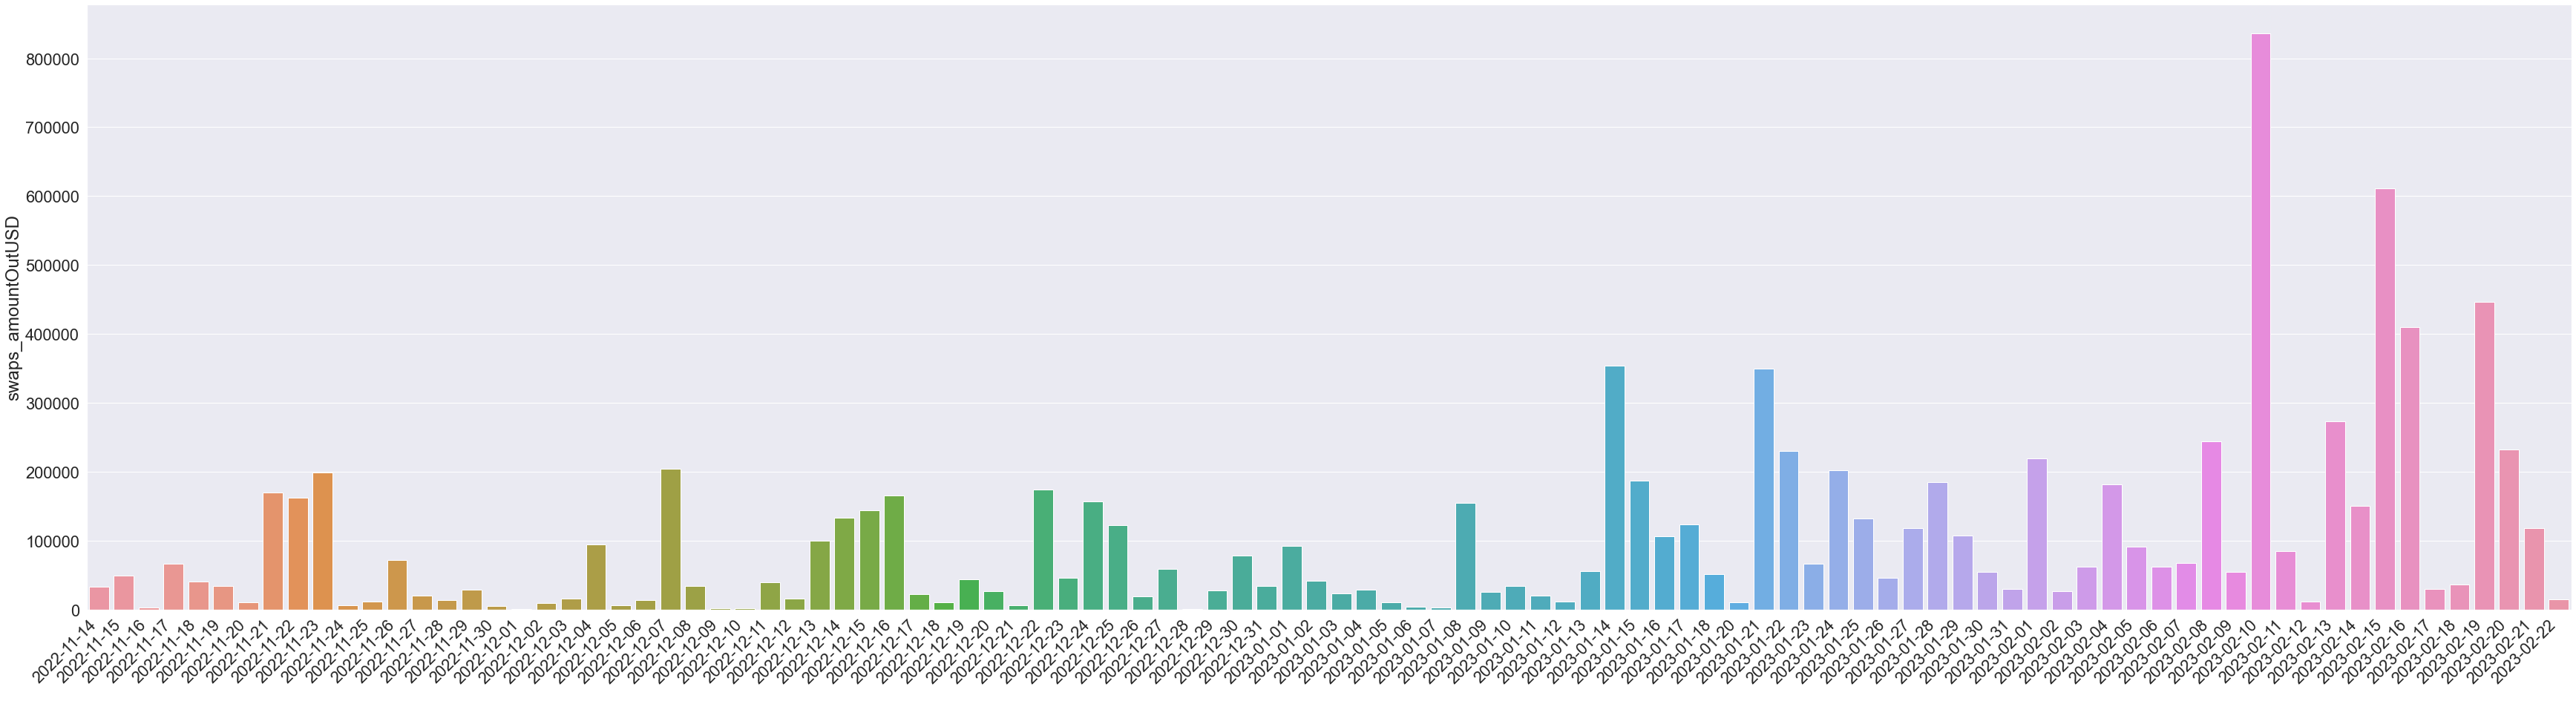

In [82]:
fig, ax = plt.subplots(figsize = (60,15))

fig = sns.barplot(x = "calDate", y = "swaps_amountOutUSD", data = balancerEventsList,
                  estimator = sum, ci = None, ax=ax)
plt.xlabel('Date', fontsize=40, color= 'white')
#ax.tick_params(colors='white', which='both')
x_dates = balancerEventsList['calDate'].dt.strftime('%Y-%m-%d').sort_values().unique()
ax.set_xticklabels(labels=x_dates, rotation=45, ha='right')

print(fig)
plt.savefig(file+'/dailySwappedOutDAI.png',transparent =False,pad_inches = 1, dpi=100)

AttributeError: 'AxesSubplot' object has no attribute 'savefig'

In [62]:
dailySwappedDAI = db.query("Select "
                           " calDate "
                           ",sum(cast(amountOutReadable as float)) swappedOutDAI "
                           ",sum(cast(swaps_amountOutUSD as float)) swappedOutUSD "
                           "from balancerEventsList "
                           "Group by 1"
                           "").df()
dailySwappedDAI.head(10)

,calDate,swappedOutDAI,swappedOutUSD
0,2023-02-22,32634.551758,32625.831787
1,2023-02-21,49088.133545,49076.712402
2,2023-02-20,2738.416260,2737.822021
3,2023-02-19,66278.790100,66268.131714
4,2023-02-18,40566.336792,40574.855225
5,2023-02-17,34317.913452,34309.801636
6,2023-02-16,10700.953857,10699.492065
7,2023-02-15,169800.121521,169919.322815
8,2023-02-14,162028.286377,162002.063721
9,2023-02-13,199296.242332,199271.170792


In [63]:
balancerPath =file+'/dailySwappedOutDAI-'+str(date.today().strftime("%b-%d-%Y"))+'.csv'
dailySwappedDAI.to_csv(balancerPath, index = False)
print('file ',balancerPath, 'saved')#and save the chart file, too


file  C:\Users\ianfe\PycharmProjects\Econohmetrics\DataOuputs/dailySwappedOutDAI-Feb-22-2023.csv saved


In [60]:
fraxEvents= frax.Query.swaps(
     orderBy='timestamp'
    ,orderDirection='desc'
    ,first=1000
    #,where = [frax.Query.swaps.pair.token0.id == '0x64aa3364f17a4d01c6f1751fd97c2bd3d7e7f1d5']
    ,where = [frax.Query.swaps.pair.token1.id == '0x64aa3364f17a4d01c6f1751fd97c2bd3d7e7f1d5']
    #,where={ 'pair': '0x66bf36dba79d4606039f04b32946a260bcd3ff52' }
    #,where = {'positions.pairid':'0x66bf36dba79d4606039f04b32946a260bcd3ff52'}
#{'users_positions_pair_id':'0x66bf36dba79d4606039f04b32946a260bcd3ff52'}

)
fraxSwapEvents= sg.query_df([
    fraxEvents.id
    ,fraxEvents.pair
    ]
)
fraxSwapEvents.head(10)

""
